In [3]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
import seaborn as sns
import importlib
import numpy as np

sns.set_theme()


In [83]:
import controllers
importlib.reload(controllers)

model = TinyPhysicsModel("./models/tinyphysics.onnx")
# controller = controllers.SimpleController()
controller = controllers.Controller2()
sim = TinyPhysicsSimulator(model, "data/00000.csv", controller=controller, debug=False, rng_seed=False)

In [84]:
for _ in range(80):
    sim.step()

In [94]:
sim.step()

Best action: -0.5, cost: -0.008194836787879467


-0.5 -0.008194837


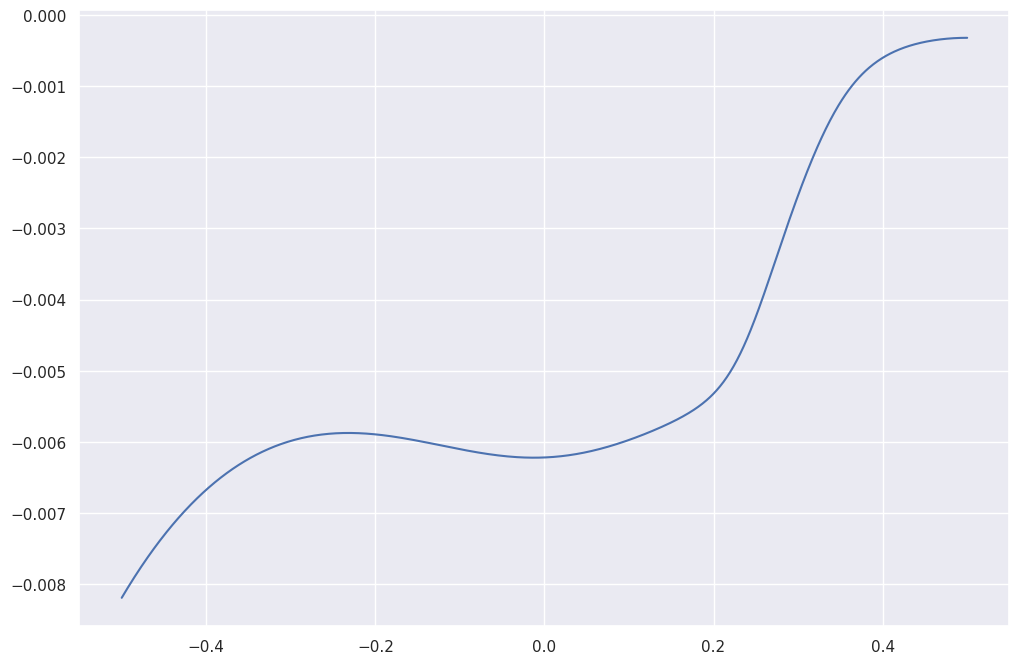

In [95]:
# x = np.linspace(-2, 2, 201)
x = controller.logs["x"]
y = controller.logs["y"]
y = np.array(y)
print(x[np.argmin(y)], min(y))
plt.plot(x, y)
# plt.ylim(0)

-0.5
0.007905998


(-0.1, 0.1)

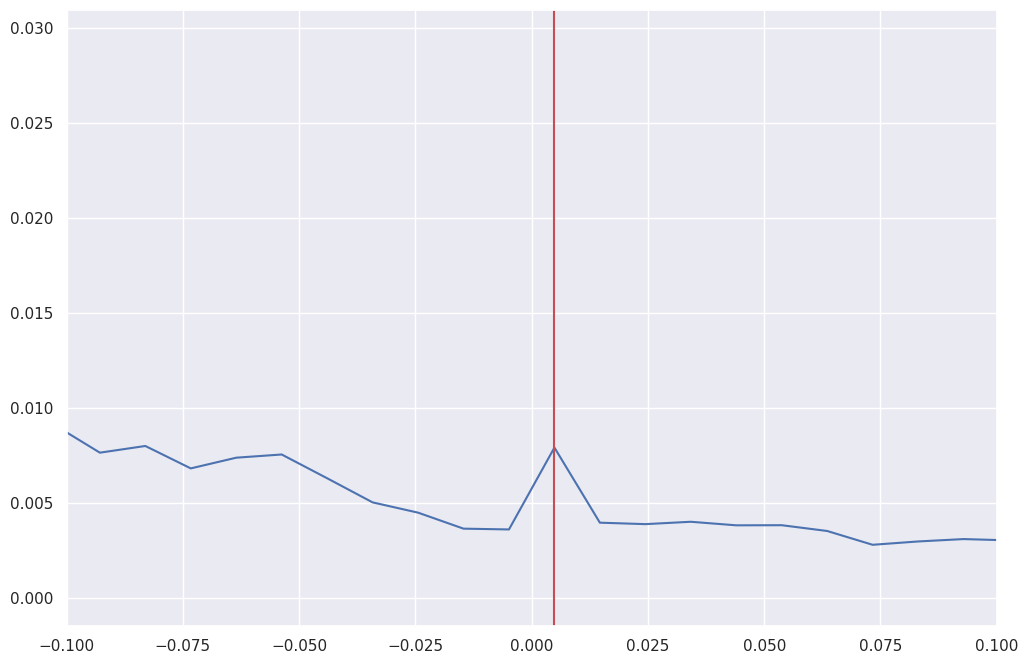

In [96]:
# logits = controller.model.get_lataccel_logits(sim.state_history[-20:], sim.action_history[-20:], sim.current_lataccel_history[-21:-1])

# probs_sim_last = controller.model.softmax(logits)
logits2 = controller.model.get_lataccel_logits(controller.state_history[-20:], controller.action_history[-19:]+[0.0], controller.lat_accel_history[-20:])

probs_controller = controller.model.softmax(logits2)

print(controller.action_history[-1])
print(probs_controller[512])

# plt.plot(np.linspace(-5, 5, 1024), probs_sim_last)
plt.plot(np.linspace(-5, 5, 1024), probs_controller)
plt.axvline(controller.lat_accel_history[-1], color='r')
plt.xlim(-0.1, 0.1)

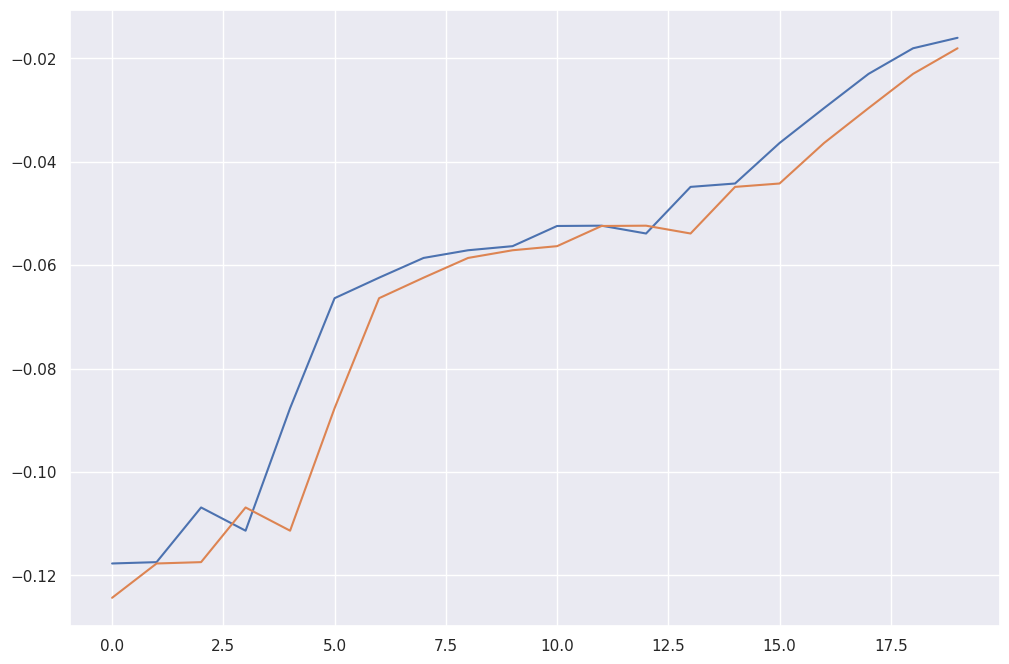

In [55]:
plt.plot(sim.current_lataccel_history[-20:])
plt.plot(controller.lat_accel_history[-20:])